## Kaggle-Superstore Dataset 專案實作

### 先在 MySQL 建立資料庫 kaggle_data 然後讀入資料

In [3]:
import pandas as pd
from sqlalchemy import create_engine

# 讀入 CSV 檔案（先確認檔案路徑正確）
df = pd.read_csv("/Users/yuchingchen/Documents/sofa_potato/MySQL_Python/data/Sample_Superstore.csv", encoding='ISO-8859-1')

# 建立 SQLAlchemy 引擎（root 沒密碼的情況）
engine = create_engine("mysql+pymysql://root:@localhost/kaggle_data")

# 匯入到 MySQL 資料庫中的一張新表，例如叫 superstore
df.to_sql(name='superstore', con=engine, index=False, if_exists='replace')

print("✅ 匯入完成！")

✅ 匯入完成！


### 查看資料

In [7]:
print(df.head()) # 看前 5 筆資料（概覽用）

print(df.columns) # 看欄位名稱

print(df.shape) # 看資料大小（幾列 × 幾欄）

print(df.dtypes) # 看每個欄位的資料型別

print(df.describe()) # 快速統計摘要（數值欄位用）

print(df.isnull().sum()) # 查看是否有缺失值

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

### 資料處理

In [8]:
df.columns = (
    df.columns.str.strip()               # 移除前後空白
              .str.replace(" ", "_")     # 空格改底線
              .str.replace("-", "_")     # 減號改底線（如 Sub-Category）
)

In [12]:
# 日期格式轉換
df["Order_Date"] = pd.to_datetime(df["Order_Date"])
df["Ship_Date"] = pd.to_datetime(df["Ship_Date"])

### 存進新的資料表

In [15]:
# 仍使用 kaggle_data 資料庫 
engine = create_engine("mysql+pymysql://root:@localhost/kaggle_data")

# 也可以儲存另一個版本，像是 superstore_cleaned
df.to_sql(name='superstore_cleaned', con=engine, index=False, if_exists='replace')

9994

### 敘述統計

In [6]:
import pandas as pd
from sqlalchemy import create_engine

# 建立 SQLAlchemy 引擎（root 沒密碼）
engine = create_engine("mysql+pymysql://root:@localhost/kaggle_data")

# 讀取資料表 superstore_cleaned
df = pd.read_sql_table("superstore_cleaned", con=engine)

df["Order_Date"] = pd.to_datetime(df["Order_Date"])
df["Order_Year"] = df["Order_Date"].dt.year

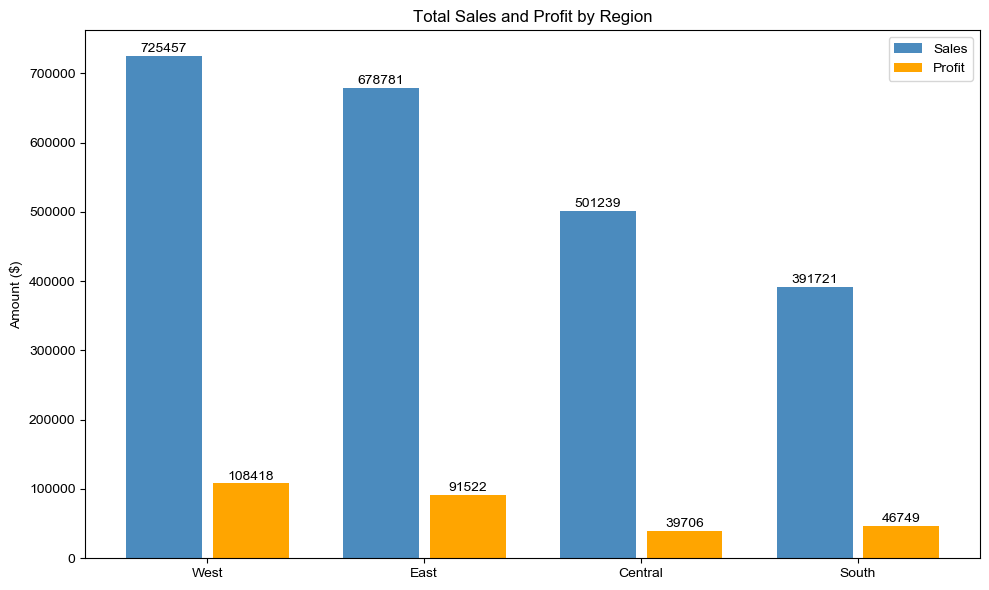

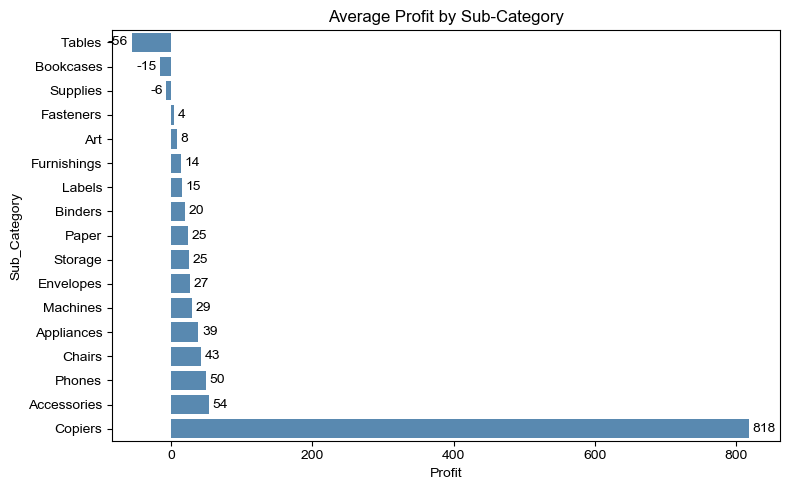

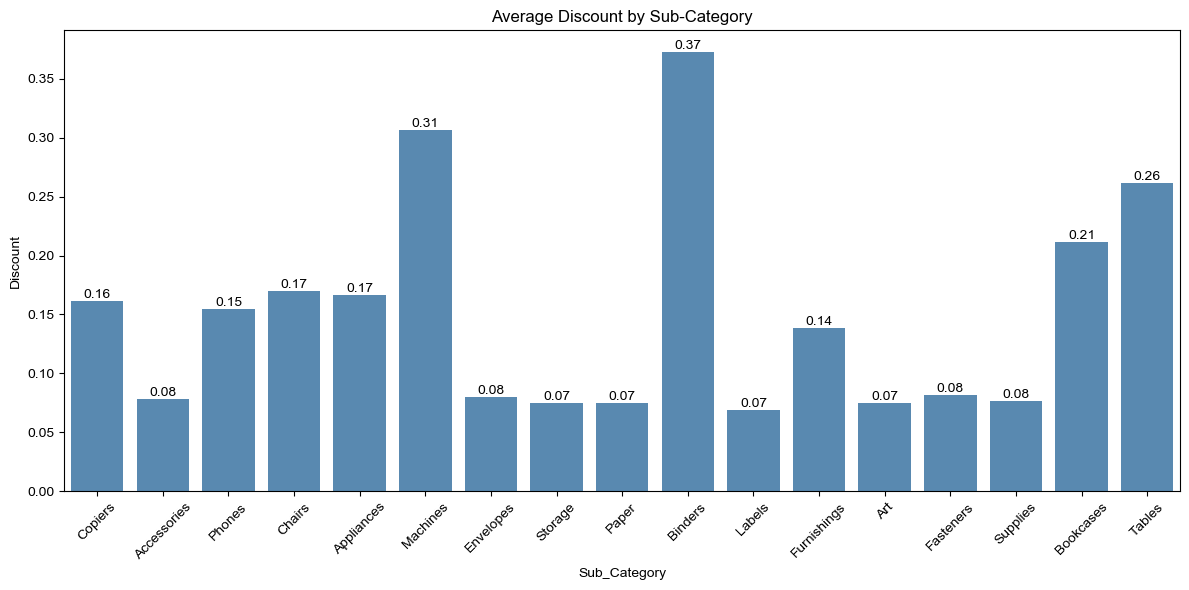

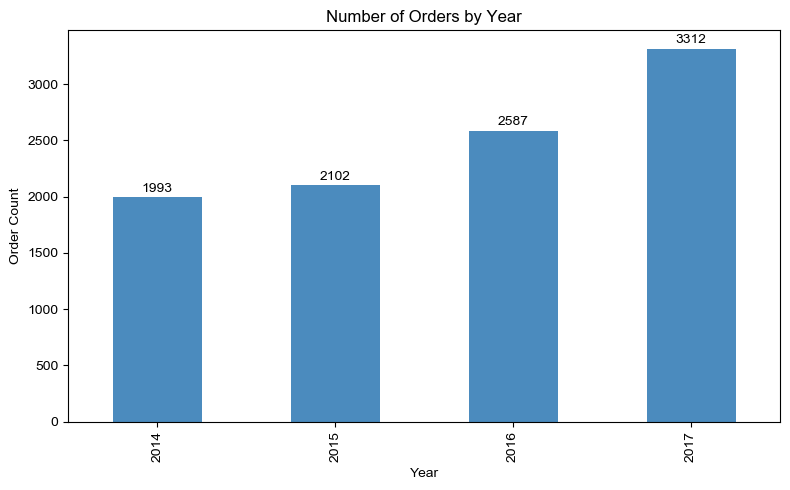

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 繁體中文設定
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# ---------- 圖 1：各地區銷售額與利潤 ----------
# 分組資料
region_stats = df.groupby("Region")[["Sales", "Profit"]].sum().sort_values("Sales", ascending=False)
# 設定位置與寬度
x = np.arange(len(region_stats))  # [0,1,2,3]
width = 0.35                      # 長條寬度
gap = 0.05                        # 額外的左右間隔
# 建圖
plt.figure(figsize=(10, 6))
bar1 = plt.bar(x - width/2 - gap/2, region_stats["Sales"], width, label="Sales", color="#4B8BBE")
bar2 = plt.bar(x + width/2 + gap/2, region_stats["Profit"], width, label="Profit", color="orange")
# 顯示數值
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2, height + 5000, f"{int(height)}", ha="center")

for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2, height + 5000, f"{int(height)}", ha="center")
# 標題與座標
plt.title("Total Sales and Profit by Region")
plt.xticks(x, region_stats.index)
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()
plt.show()

# ---------- 圖 2：各子分類平均利潤----------
plt.figure(figsize=(8, 5))
cat_stats_sorted = cat_stats.sort_values("Profit")
ax = sns.barplot(data=cat_stats_sorted, y="Sub_Category", x="Profit", color="#4B8BBE")
plt.title("Average Profit by Sub-Category")
# 顯示標籤
for i, v in enumerate(cat_stats_sorted["Profit"]):
    if v > 0:
        ax.text(v + 5, i, f"{v:.0f}", color='black', va='center')
    else:
        ax.text(v - 5, i, f"{v:.0f}", color='black', va='center', ha='right')
# 手動設定 X 軸顯示範圍，留空間給負數標籤
min_profit = cat_stats_sorted["Profit"].min()
plt.xlim(min_profit * 1.5, None) 
plt.tight_layout()
plt.show()

# ---------- 圖 3：各子分類平均折扣 ----------
plt.figure(figsize=(12, 6))
ax3 = sns.barplot(data=cat_stats, x="Sub_Category", y="Discount",
                  color="#4B8BBE")
plt.title("Average Discount by Sub-Category")
plt.xticks(rotation=45)
# 顯示數值
for p in ax3.patches:
    ax3.annotate(f'{p.get_height():.2f}',
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom')
plt.tight_layout()
plt.show()

# ---------- 圖 4：每年訂單數量 ----------
df["Order_Year"] = df["Order_Date"].dt.year
order_count = df["Order_Year"].value_counts().sort_index()
plt.figure(figsize=(8, 5))
ax = order_count.plot(kind="bar", color="#4B8BBE")
plt.title("Number of Orders by Year")
plt.xlabel("Year")
plt.ylabel("Order Count")
# 顯示數值
for i, v in enumerate(order_count):
    plt.text(i, v + 50, str(v), ha='center')

plt.tight_layout()
plt.show()